## Esetrcizio 11.2 - Fit polinomiale

In questo esercizio ho esteso il modello dell'esercizio precedente per ottenere un fit del polinomio
$$
f(x)=4-3x-2x^2+3x^3
$$
nell'intervallo $x \in [-1,1]$.

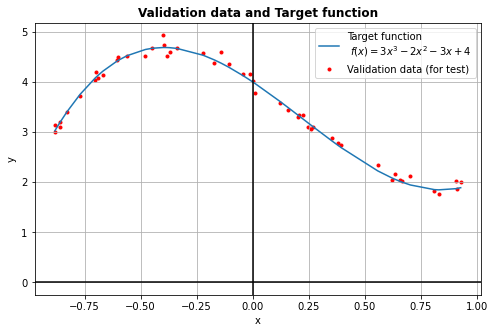

In [287]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri da indagare
N_epochs = 8
N_train = 3000 # <<< train
N_valid = 50 # <<< test
Sigma = 0.1

# target parameters of 
# f(x) = 3x^3 - 2x^2 - 3x + 4 
# f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)        # training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # ...
x_valid.sort()
y_target = a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d 
                                                   # target polinomial function

sigma = Sigma                                      # noise standard deviation
y_train = np.random.normal(a * x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) 
                                                   # array of measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d, sigma)
                                                   # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

In [288]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# Many neurons are needed to make the fitting job
# and activation functions need to be specifief.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# activation: relu-si, elu-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no, exponential-no
act = 'relu'
model.add(Dense(40, input_shape=(1,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(20, activation = act))
model.add(Dense(10, activation = act))
model.add(Dense(5, activation = act))
model.add(Dense(1, activation = act))

# compile the model choosing optimizer, loss and metrics objects
# optimizers: sgd-sì, rmsprop-sì, adam-?, adadelta-sì, adagrad-?, adamax-ni, nadam-sì, ftrl-no
opt = 'rmsprop'
# loss functios: mse-sì, mae-nì, msle-ni, logcosh-ni, kld-no(molto strana)
lf = 'mse'
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
# model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_valid, y_valid))

Epoch 1/8
94/94 [==============================] - 4s 17ms/step - loss: 6.4192 - mse: 6.4192 - val_loss: 1.0239 - val_mse: 1.0239
Epoch 2/8
94/94 [==============================] - 1s 12ms/step - loss: 0.6274 - mse: 0.6274 - val_loss: 0.2258 - val_mse: 0.2258
Epoch 3/8
94/94 [==============================] - 1s 10ms/step - loss: 0.1695 - mse: 0.1695 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 4/8
94/94 [==============================] - 2s 18ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 5/8
94/94 [==============================] - 1s 16ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 6/8
94/94 [==============================] - 1s 13ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 7/8
94/94 [==============================] - 1s 10ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 8/8
94/94 [==============================] - 1s 12ms/step - loss: 0.0181 - mse: 0.01

TEST DATA evaluation
Test loss:      0.011039681732654572
Test accuracy:  0.011039681732654572

EXACT CURVE evaluation
Test loss:      0.005678881891071796
Test accuracy:  0.005678881891071796


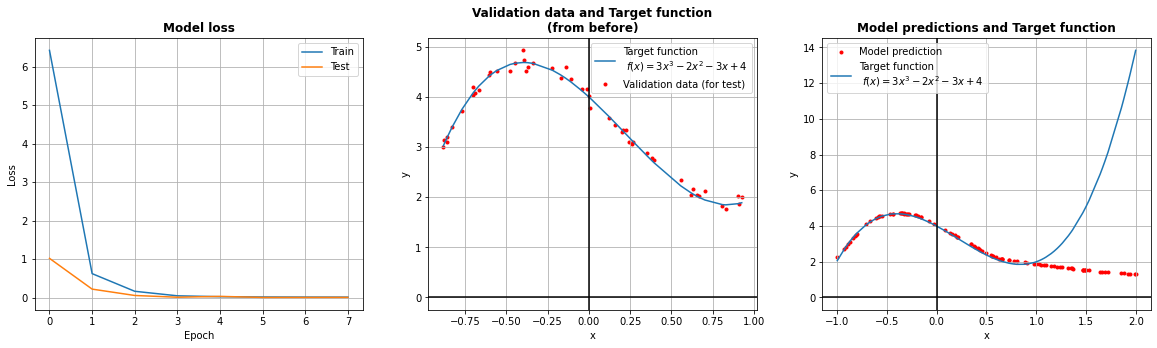

In [289]:
# ==============================================
# Return Weights and Biases
# ==============================================

# print("Guessed parameters")
w = model.get_weights()
# print(w)

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function\n(from before)", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = a * x_predicted*x_predicted*x_predicted + b*x_predicted*x_predicted + c*x_predicted + d # target polinomial function
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

### Osservazioni

Dopo aver preso un po di dimestichezza con la nuova rete mi sono proposto di ottenere una determina accuratezza di test con un minor tempo di calcolo possibile.
Ho cercato di portare l'**accuracy del test** sui dati prossima a 0.01.

Ho osservato che oltre un certo numero di **epoche** la riduzione dell'accuratezza non è significativa, quindi ho fissato le epoche a 8.
Ho poi verificato che un numero molto alto di **nodi** combinato con una ridotta **profondità** della rete non era sufficiente a garantire il risultato a cui puntavo, quindi ho fissato il numero di **livelli** a 5.
Confrontando diverse **funzioni di attivazione** ho visto che i risultati migliori erano garantiti dalla `relu`, seguita dalla `elu`.
Per quanto riguarda gli **ottimizzatori**, non ho notato significative differenze tra l'uno e l'altro (a parte che non sono riuscito a far funzionare la rete con adam e adagrad), eccetto `ftrl` che mi ha dato pessimi risultati rispetto agli altri. Tra le loss function che ho provato quella che ha dato i risultati migliori è stata la `mse`, la stessa che ho usato durante tutte le precedenti fasi di calibrazione.

Alla fine delle prove, ho scelto di tenere i parametri che sono rimasti salvati nell'attuale versione di questo Notebook.

In ogni caso ho osservato che la stima dell'accuratezza balla tra $0.008$ e $0.017$ anche una volta fissati i parametri della rete: questo è dovuto al generatore di numeri casuali di Python, che non riparte sempre dallo stesso punto, come faceva il nostro.



  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model (DOMANDA MOLTO IMPORTANTE! OSSERVARE BENE!)? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.